<a href="https://colab.research.google.com/github/iamRahulB/Income-inequality-prediction/blob/main/Copy_of_income_inequality_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [187]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [188]:
# lets import necessory things
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# <span style="text-align:center">⬇️ Import Data</span>

In [189]:
df=pd.read_csv("https://files.taskade.com/attachments/3783a3b3-83db-4708-b7d7-1e76d79ee68b/original/data.csv")

In [190]:
df.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,unemployment_reason,employment_stat,wage_per_hour,is_labor_union,working_week_per_year,industry_code,industry_code_main,occupation_code,occupation_code_main,total_employed,household_stat,household_summary,under_18_family,veterans_admin_questionnaire,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,NaN,NaN,Widowed,White,All other,Not in labor force,NaN,0,0,NaN,52,0,Not in universe or children,0,NaN,2,Householder,Householder,NaN,NaN,2,Head of household,0,0,292,Native,95,US,US,US,?,?,?,?,NaN,NaN,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,NaN,NaN,Widowed,White,All other,Children or Armed Forces,NaN,0,0,NaN,0,0,Not in universe or children,0,NaN,0,Nonfamily householder,Householder,NaN,NaN,2,Single,0,0,0,Native,94,US,US,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,NaN,Never married,Black,All other,Children or Armed Forces,NaN,0,500,No,15,41,Hospital services,26,Adm support including clerical,4,Child 18+ never marr Not in a subfamily,Child 18 or older,NaN,NaN,2,Single,0,0,0,Native,94,US,US,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,NaN,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,NaN,0,0,NaN,0,0,Not in universe or children,0,NaN,0,Child <18 never marr not in subfamily,Child under 18 never married,Both parents present,NaN,0,Nonfiler,0,0,0,Native,94,US,India,India,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,NaN,0,0,NaN,0,0,Not in universe or children,0,NaN,0,Spouse of householder,Spouse of householder,NaN,NaN,2,Joint both 65+,0,0,0,Native,95,US,US,US,?,?,?,?,NaN,NaN,NaN,1580.79,Below limit


<div class="alert alert-danger" style="font-size:14px; font-family:verdana; line-height: 1.7em;">

Here We are not able to see all columns so we can use pandas set option method to see all column

In [191]:
pd.set_option("display.max_columns",None)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [192]:
df.head(5)

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,unemployment_reason,employment_stat,wage_per_hour,is_labor_union,working_week_per_year,industry_code,industry_code_main,occupation_code,occupation_code_main,total_employed,household_stat,household_summary,under_18_family,veterans_admin_questionnaire,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,NaN,NaN,Widowed,White,All other,Not in labor force,NaN,0,0,NaN,52,0,Not in universe or children,0,NaN,2,Householder,Householder,NaN,NaN,2,Head of household,0,0,292,Native,95,US,US,US,?,?,?,?,NaN,NaN,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,NaN,NaN,Widowed,White,All other,Children or Armed Forces,NaN,0,0,NaN,0,0,Not in universe or children,0,NaN,0,Nonfamily householder,Householder,NaN,NaN,2,Single,0,0,0,Native,94,US,US,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,NaN,Never married,Black,All other,Children or Armed Forces,NaN,0,500,No,15,41,Hospital services,26,Adm support including clerical,4,Child 18+ never marr Not in a subfamily,Child 18 or older,NaN,NaN,2,Single,0,0,0,Native,94,US,US,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,NaN,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,NaN,0,0,NaN,0,0,Not in universe or children,0,NaN,0,Child <18 never marr not in subfamily,Child under 18 never married,Both parents present,NaN,0,Nonfiler,0,0,0,Native,94,US,India,India,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,NaN,0,0,NaN,0,0,Not in universe or children,0,NaN,0,Spouse of householder,Spouse of householder,NaN,NaN,2,Joint both 65+,0,0,0,Native,95,US,US,US,?,?,?,?,NaN,NaN,NaN,1580.79,Below limit


In [193]:
df.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209499 entries, 0 to 209498
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              209499 non-null  object 
 1   age                             209499 non-null  int64  
 2   gender                          209499 non-null  object 
 3   education                       209499 non-null  object 
 4   class                           104254 non-null  object 
 5   education_institute             13302 non-null   object 
 6   marital_status                  209499 non-null  object 
 7   race                            209499 non-null  object 
 8   is_hispanic                     209499 non-null  object 
 9   employment_commitment           209499 non-null  object 
 10  unemployment_reason             6520 non-null    object 
 11  employment_stat                 209499 non-null  int64  
 12  wage_per_hour   

In [194]:
print(f"Rows :{df.shape[0]}\nColumns:{df.shape[1]}")

Rows :209499
Columns:43


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [195]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,209499.0,34.518728,22.306738,0.00,15.00,33.00,50.00,90.0
employment_stat,209499.0,0.176760,0.555562,0.00,0.00,0.00,0.00,2.0
wage_per_hour,209499.0,55.433487,276.757327,0.00,0.00,0.00,0.00,9999.0
working_week_per_year,209499.0,23.158850,24.397963,0.00,0.00,8.00,52.00,52.0
industry_code,209499.0,15.332398,18.049655,0.00,0.00,0.00,33.00,51.0
occupation_code,209499.0,11.321734,14.460839,0.00,0.00,0.00,26.00,46.0
total_employed,209499.0,1.956067,2.365154,0.00,0.00,1.00,4.00,6.0
vet_benefit,209499.0,1.515854,0.850853,0.00,2.00,2.00,2.00,2.0
gains,209499.0,435.926887,4696.359500,0.00,0.00,0.00,0.00,99999.0
losses,209499.0,36.881737,270.383302,0.00,0.00,0.00,0.00,4608.0


In [196]:
df.describe(include="O").T

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count,unique,top,freq
ID,209499,209499,ID_TZ0000,1
gender,209499,2,Female,108784
education,209499,17,High school graduate,50627
class,104254,8,Private,75617
education_institute,13302,2,High school,7247
marital_status,209499,7,Never married,90723
race,209499,5,White,175709
is_hispanic,209499,10,All other,180404
employment_commitment,209499,8,Children or Armed Forces,129789
unemployment_reason,6520,5,Other job loser,2242


# 📊 Exploratory Data Analysis

In [197]:
numerical_features=[var for var in df.columns if df[var].dtypes!="O"]
categorical_features=[var for var in df.columns if var not in numerical_features]
discrete_features=[var for var in numerical_features if len(df[var].unique())<25]
contineous_features=[var for var in numerical_features if var not in discrete_features]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [198]:
# for i in categorical_features:
#     print(f"{i}: {df[i].unique()}\n")

ordinal_fetaures=["education","education_institute"]

In [199]:
print(f" Numerical features counts: {len(numerical_features)}")
print(f" Categorical features counts: {len(categorical_features)}")
print(f" Discrete features counts: {len(discrete_features)}")
print(f" Contineous features counts: {len(contineous_features)}")
print(f" Ordinal features counts: {len(ordinal_fetaures)}")

 Numerical features counts: 13
 Categorical features counts: 30
 Discrete features counts: 4
 Contineous features counts: 9
 Ordinal features counts: 2


In [200]:
df.isnull().mean()*100

ID                                 0.000000
age                                0.000000
gender                             0.000000
education                          0.000000
class                             50.236517
education_institute               93.650566
marital_status                     0.000000
race                               0.000000
is_hispanic                        0.000000
employment_commitment              0.000000
unemployment_reason               96.887813
employment_stat                    0.000000
wage_per_hour                      0.000000
is_labor_union                    90.415706
working_week_per_year              0.000000
industry_code                      0.000000
industry_code_main                 0.000000
occupation_code                    0.000000
occupation_code_main              50.450837
total_employed                     0.000000
household_stat                     0.000000
household_summary                  0.000000
under_18_family                 

In [201]:
df.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,unemployment_reason,employment_stat,wage_per_hour,is_labor_union,working_week_per_year,industry_code,industry_code_main,occupation_code,occupation_code_main,total_employed,household_stat,household_summary,under_18_family,veterans_admin_questionnaire,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,NaN,NaN,Widowed,White,All other,Not in labor force,NaN,0,0,NaN,52,0,Not in universe or children,0,NaN,2,Householder,Householder,NaN,NaN,2,Head of household,0,0,292,Native,95,US,US,US,?,?,?,?,NaN,NaN,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,NaN,NaN,Widowed,White,All other,Children or Armed Forces,NaN,0,0,NaN,0,0,Not in universe or children,0,NaN,0,Nonfamily householder,Householder,NaN,NaN,2,Single,0,0,0,Native,94,US,US,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,NaN,Never married,Black,All other,Children or Armed Forces,NaN,0,500,No,15,41,Hospital services,26,Adm support including clerical,4,Child 18+ never marr Not in a subfamily,Child 18 or older,NaN,NaN,2,Single,0,0,0,Native,94,US,US,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,NaN,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,NaN,0,0,NaN,0,0,Not in universe or children,0,NaN,0,Child <18 never marr not in subfamily,Child under 18 never married,Both parents present,NaN,0,Nonfiler,0,0,0,Native,94,US,India,India,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,NaN,0,0,NaN,0,0,Not in universe or children,0,NaN,0,Spouse of householder,Spouse of householder,NaN,NaN,2,Joint both 65+,0,0,0,Native,95,US,US,US,?,?,?,?,NaN,NaN,NaN,1580.79,Below limit




<div class="alert alert-danger" style="font-size:14px; font-family:verdana; line-height: 1.7em;">

Observations: As we can see in some of the last columns contains "?" characters so we will fill them with NA

In [202]:
df.replace(" ?", np.nan, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [203]:
df.head(5)

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,unemployment_reason,employment_stat,wage_per_hour,is_labor_union,working_week_per_year,industry_code,industry_code_main,occupation_code,occupation_code_main,total_employed,household_stat,household_summary,under_18_family,veterans_admin_questionnaire,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,NaN,NaN,Widowed,White,All other,Not in labor force,NaN,0,0,NaN,52,0,Not in universe or children,0,NaN,2,Householder,Householder,NaN,NaN,2,Head of household,0,0,292,Native,95,US,US,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,NaN,NaN,Widowed,White,All other,Children or Armed Forces,NaN,0,0,NaN,0,0,Not in universe or children,0,NaN,0,Nonfamily householder,Householder,NaN,NaN,2,Single,0,0,0,Native,94,US,US,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,NaN,Never married,Black,All other,Children or Armed Forces,NaN,0,500,No,15,41,Hospital services,26,Adm support including clerical,4,Child 18+ never marr Not in a subfamily,Child 18 or older,NaN,NaN,2,Single,0,0,0,Native,94,US,US,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,NaN,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,NaN,0,0,NaN,0,0,Not in universe or children,0,NaN,0,Child <18 never marr not in subfamily,Child under 18 never married,Both parents present,NaN,0,Nonfiler,0,0,0,Native,94,US,India,India,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,NaN,0,0,NaN,0,0,Not in universe or children,0,NaN,0,Spouse of householder,Spouse of householder,NaN,NaN,2,Joint both 65+,0,0,0,Native,95,US,US,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1580.79,Below limit


In [204]:
df.isnull().mean()*100

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ID                                 0.000000
age                                0.000000
gender                             0.000000
education                          0.000000
class                             50.236517
education_institute               93.650566
marital_status                     0.000000
race                               0.000000
is_hispanic                        0.000000
employment_commitment              0.000000
unemployment_reason               96.887813
employment_stat                    0.000000
wage_per_hour                      0.000000
is_labor_union                    90.415706
working_week_per_year              0.000000
industry_code                      0.000000
industry_code_main                 0.000000
occupation_code                    0.000000
occupation_code_main              50.450837
total_employed                     0.000000
household_stat                     0.000000
household_summary                  0.000000
under_18_family                 

In [205]:
df["income_above_limit"].value_counts().index.tolist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['Below limit', 'Above limit']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


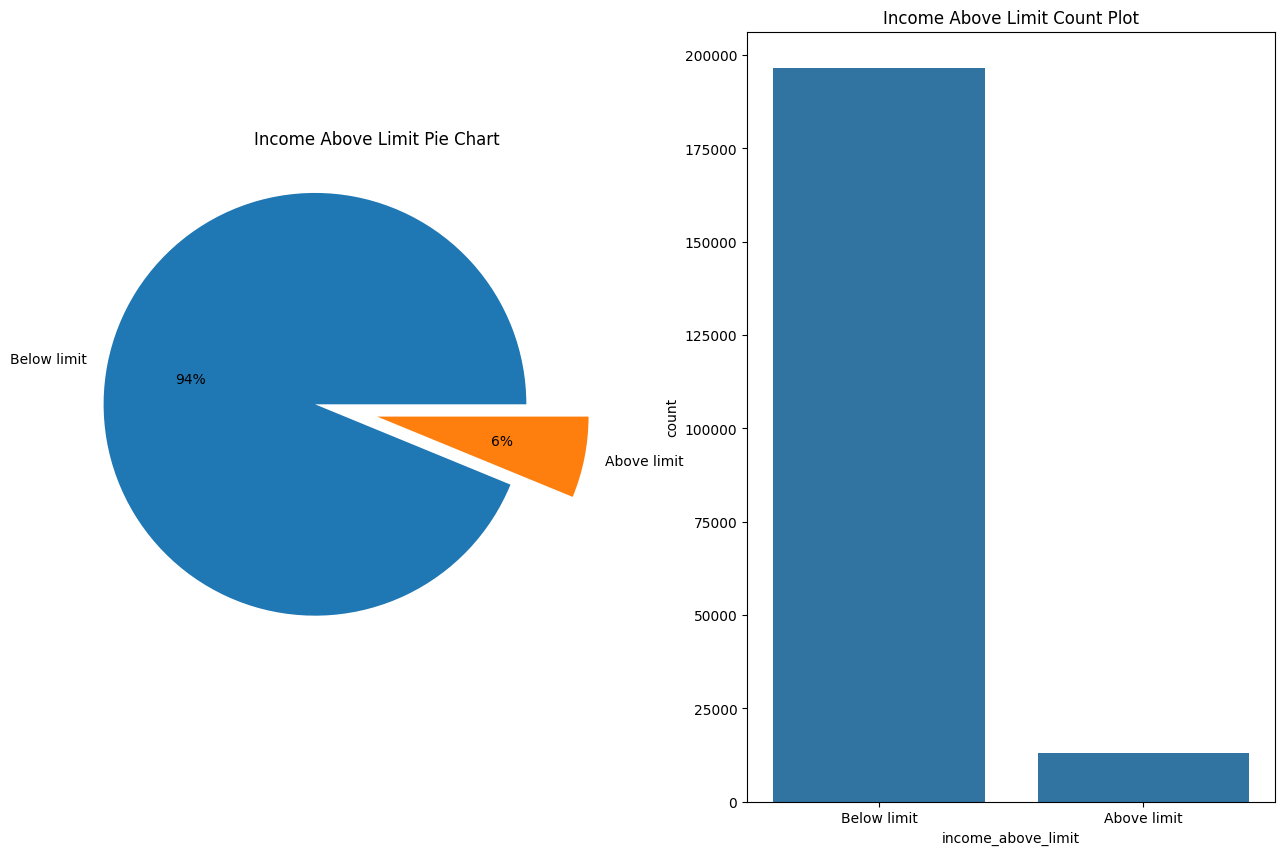

In [206]:
plt.figure(figsize=(15, 10))

# Subplot 1: Pie Chart
plt.subplot(1, 2, 1)
plt.pie(df["income_above_limit"].value_counts(), labels=df["income_above_limit"].value_counts().index.tolist(), autopct='%.0f%%', explode=[0.3, 0])
plt.title('Income Above Limit Pie Chart')

# Subplot 2: Count Plot
plt.subplot(1, 2, 2)
sns.countplot(data=df, x="income_above_limit")
plt.title('Income Above Limit Count Plot')

plt.show()

<div style="border-radius:10px; border:black solid; padding: 15px; background-color:grey; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>
    
* The dataset is unbalanced, as the dependent feature 'income_above_limit' contains 93.8% values have income less than limit and 6.2% values have income more than limit
* So many null values are also present which is not great

Now we will try for Discrete features.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


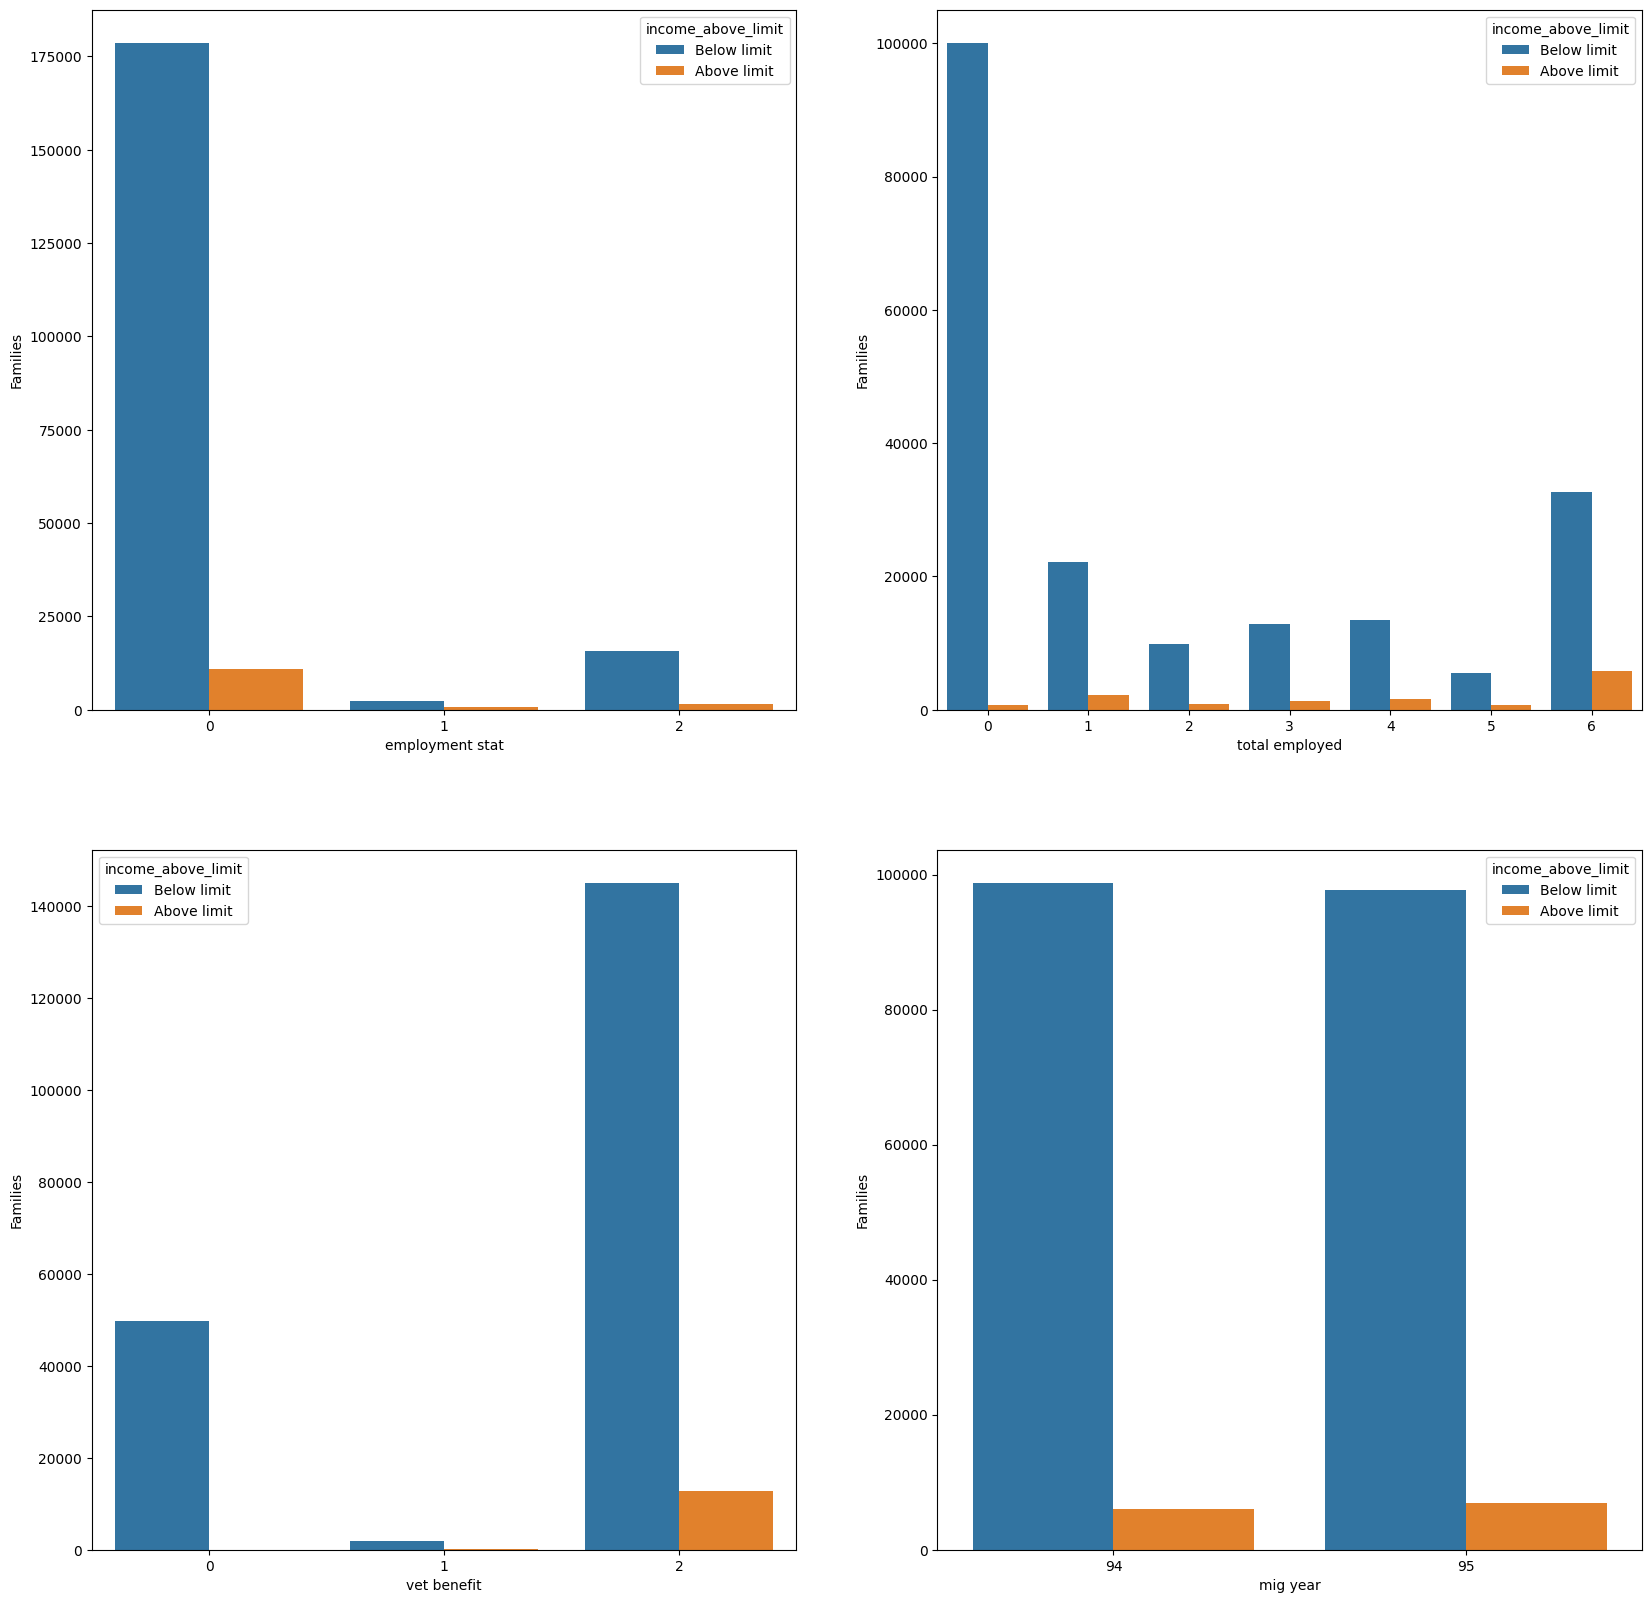

In [207]:
plt.figure(figsize=(20,20))
a=0
for i in discrete_features:
    a=a+1
    plt.subplot(2,2,a)
    sns.countplot(data=df, x=i,hue="income_above_limit")
    plt.xlabel((lambda x: " ".join(x.split("_")))(i))
    plt.ylabel("Families")

<div style="border-radius:10px; border:black solid; padding: 15px; background-color:grey; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>

* from above graph below things are observed
1. most of the families having below income limit
2. from employed column we can see that when there are more number of members employed then income level increases

Now we will go for catwegorical features


In [208]:
cat_to_viz=[var for var in categorical_features if len(df[var].unique())<10 ]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


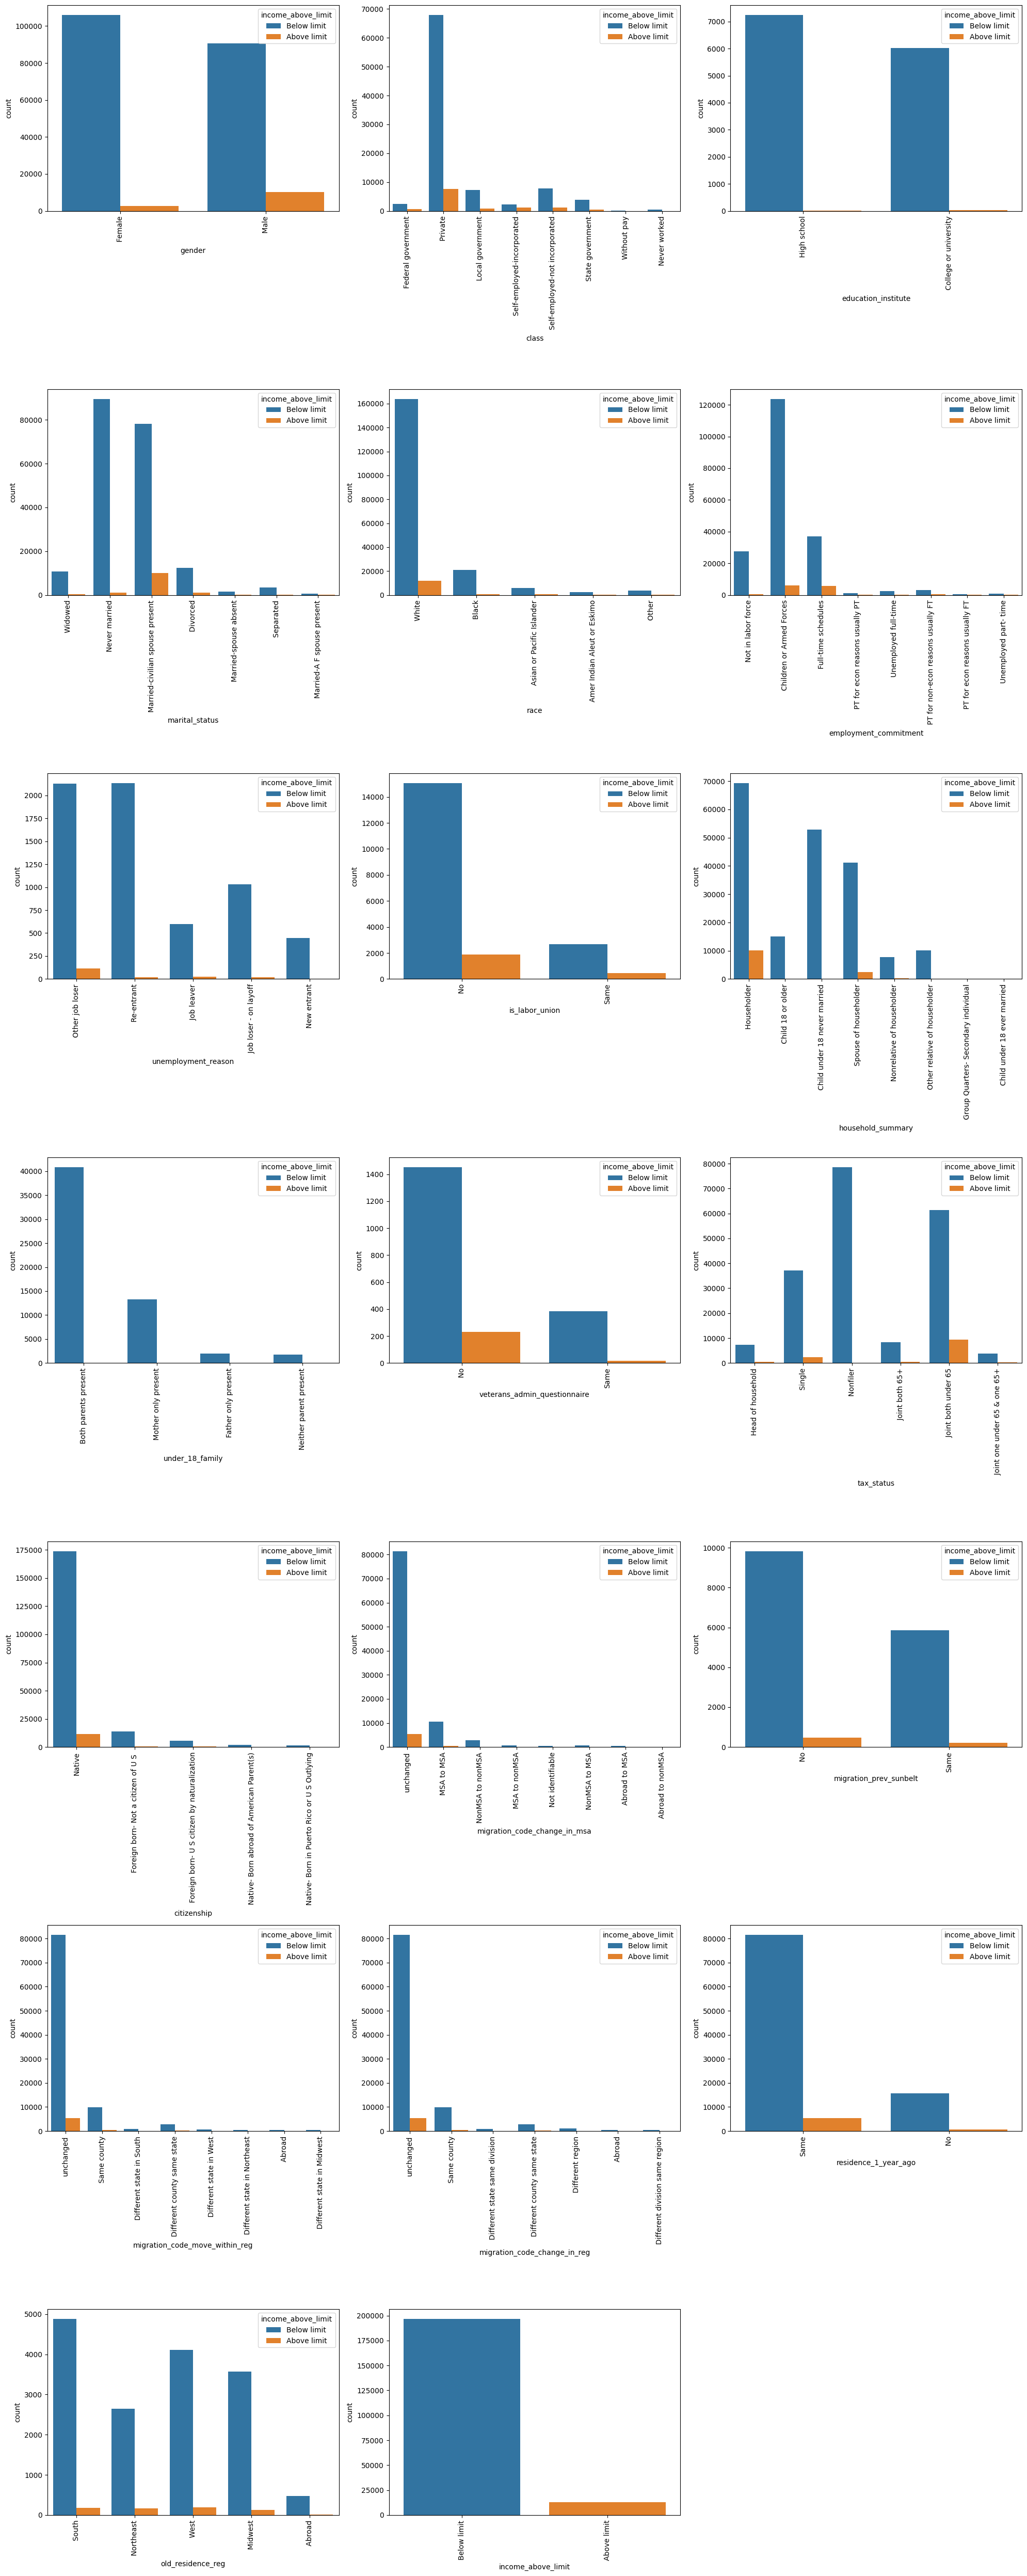

In [209]:
plt.figure(figsize=(20,50))
a=0
for i in cat_to_viz:
    a=a+1
    plt.subplot(7,3,a)
    sns.countplot(data=df,x=i,hue="income_above_limit")
    plt.xticks(rotation=90)


plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<b>Observations:</b>
</div>

In [210]:
df.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,unemployment_reason,employment_stat,wage_per_hour,is_labor_union,working_week_per_year,industry_code,industry_code_main,occupation_code,occupation_code_main,total_employed,household_stat,household_summary,under_18_family,veterans_admin_questionnaire,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,NaN,NaN,Widowed,White,All other,Not in labor force,NaN,0,0,NaN,52,0,Not in universe or children,0,NaN,2,Householder,Householder,NaN,NaN,2,Head of household,0,0,292,Native,95,US,US,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,NaN,NaN,Widowed,White,All other,Children or Armed Forces,NaN,0,0,NaN,0,0,Not in universe or children,0,NaN,0,Nonfamily householder,Householder,NaN,NaN,2,Single,0,0,0,Native,94,US,US,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,NaN,Never married,Black,All other,Children or Armed Forces,NaN,0,500,No,15,41,Hospital services,26,Adm support including clerical,4,Child 18+ never marr Not in a subfamily,Child 18 or older,NaN,NaN,2,Single,0,0,0,Native,94,US,US,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,NaN,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,NaN,0,0,NaN,0,0,Not in universe or children,0,NaN,0,Child <18 never marr not in subfamily,Child under 18 never married,Both parents present,NaN,0,Nonfiler,0,0,0,Native,94,US,India,India,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,NaN,0,0,NaN,0,0,Not in universe or children,0,NaN,0,Spouse of householder,Spouse of householder,NaN,NaN,2,Joint both 65+,0,0,0,Native,95,US,US,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1580.79,Below limit




<div style="border-radius:10px; border: #0080FF solid; padding: 15px; background-color: #CEF6F5; font-size:100%; text-align:left">
<font color='#0080FF'>Question 1: Does gender has income inequality?</font>

In [211]:
# For males
male_below_limit=df[(df["gender"]==" Male") & (df["income_above_limit"]=="Below limit")].shape[0]
total_males=df[df["gender"]==" Male"].shape[0]
per_males_below_limit=(male_below_limit/total_males)*100
print("Males with below above limit :", per_males_below_limit)

# for females
total_females=df[df["gender"]!=" Male"].shape[0]
female_below=df[(df["gender"]!=" Male") & (df["income_above_limit"]=="Below limit")].shape[0]
per_female_below_limit=(female_below/total_females)*100

print("FeMales with income below limit :", per_female_below_limit)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Males with below above limit : 89.86248324479969
FeMales with income below limit : 97.43712310633916


In [212]:
# Now we will see how many numbers of males and females are below limit

print("Total males below limit",df[(df["gender"]==" Male") & (df["income_above_limit"]=="Below limit")].shape[0])
print("Total females below limit", df[(df["gender"]!=" Male") & (df["income_above_limit"]=="Below limit")].shape[0])

Total males below limit 90505
Total females below limit 105996


<div class="alert alert-success" style="font-size:14px; font-family:verdana; line-height: 1.7em;">

There is very less difference in the income in males and females

<div style="border-radius:10px; border: #0080FF solid; padding: 15px; background-color: #CEF6F5; font-size:100%; text-align:left">
<font color='#0080FF'>Question 2: Does citizenship matters in income?</font>


In [213]:
print(" Native citizens having income below limit", df[(df["citizenship"]=="Native") & (df["income_above_limit"]=="Below limit")].shape[0]/df[df["citizenship"]=="Native"].shape[0]*100)
print(" Non-Native citizens having income below limit", df[(df["citizenship"]!="Native") & (df["income_above_limit"]=="Below limit")].shape[0]/df[df["citizenship"]!="Native"].shape[0]*100)

 Native citizens having income below limit 93.69307746581282
 Non-Native citizens having income below limit 94.5950482584977


<div class="alert alert-success" style="font-size:14px; font-family:verdana; line-height: 1.7em;">

There is no huge difference in income limit of native and non-native peoples
    

    

<div style="border-radius:10px; border: #0080FF solid; padding: 15px; background-color: #CEF6F5; font-size:100%; text-align:left">
<font color='#0080FF'>
Question 3: Does number of employed persons matter?</font>

In [214]:
print('Employed more than 1 but income is below limit:',len(df[(df['total_employed']>1) & (df['income_above_limit']=='Below limit')])/len(df.loc[(df['total_employed']>1)]) * 100, '%')
print('Employed only 1 but income is below limit:',len(df[(df['total_employed']==1) & (df['income_above_limit']=='Below limit')])/len(df.loc[(df['total_employed']==1)]) * 100, '%')
print('None employed and income is below limit:',len(df[(df['total_employed']==0) & (df['income_above_limit']=='Below limit')])/len(df.loc[(df['total_employed']==0)]) * 100, '%')

Employed more than 1 but income is below limit: 87.92360338172259 %
Employed only 1 but income is below limit: 91.140123988997 %
None employed and income is below limit: 99.36337994597172 %


In [215]:
print('People above income limit with more than 1 employed:',len(df[(df['total_employed']>1) & (df['income_above_limit']=='Above limit')]))
print('People above income limit with only 1 employed:',len(df[(df['total_employed']==1) & (df['income_above_limit']=='Above limit')]))

People above income limit with more than 1 employed: 10199
People above income limit with only 1 employed: 2158


<div class="alert alert-success" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
Numerical Distribution ⬇️

In [216]:
for i in numerical_features:
    print(df[i].dtype)

int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
float64


In [217]:
numerical_features

['age',
 'employment_stat',
 'wage_per_hour',
 'working_week_per_year',
 'industry_code',
 'occupation_code',
 'total_employed',
 'vet_benefit',
 'gains',
 'losses',
 'stocks_status',
 'mig_year',
 'importance_of_record']

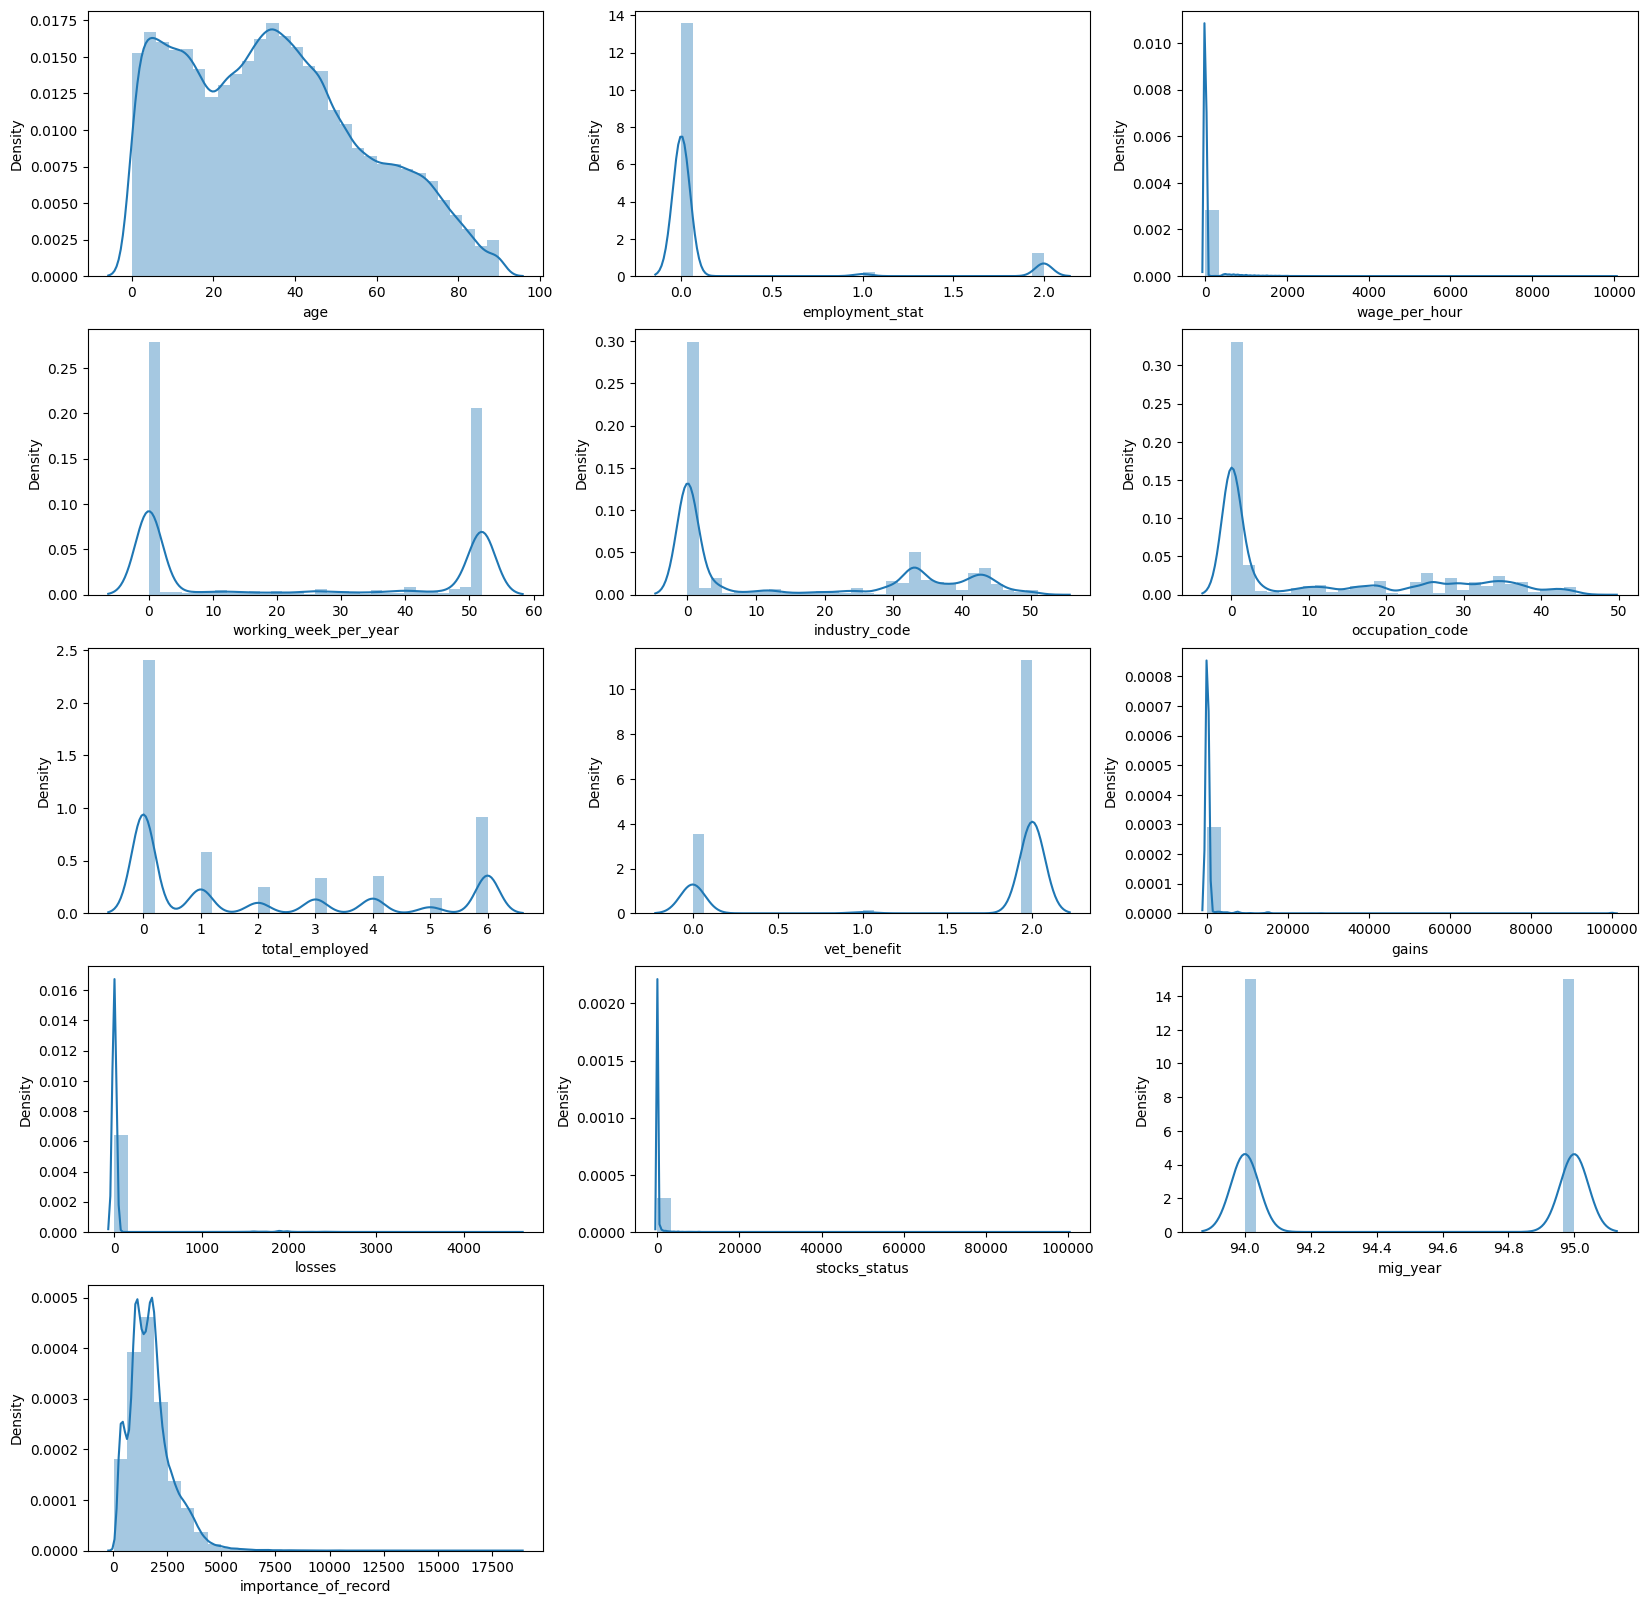

In [218]:
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore")


plt.figure(figsize=(20,20))
a=0
for i in numerical_features:
    a=a+1
    plt.subplot(5,3,a)
    sns.distplot(df[i],kde=True, bins=30)
plt.show()

warnings.resetwarnings()


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: grey; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>
   
* The working week per hour again shows that as there are so many children the ditribution has a high peak at 0 working hours
* There are so many people with low wages i.e. less than 2000

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


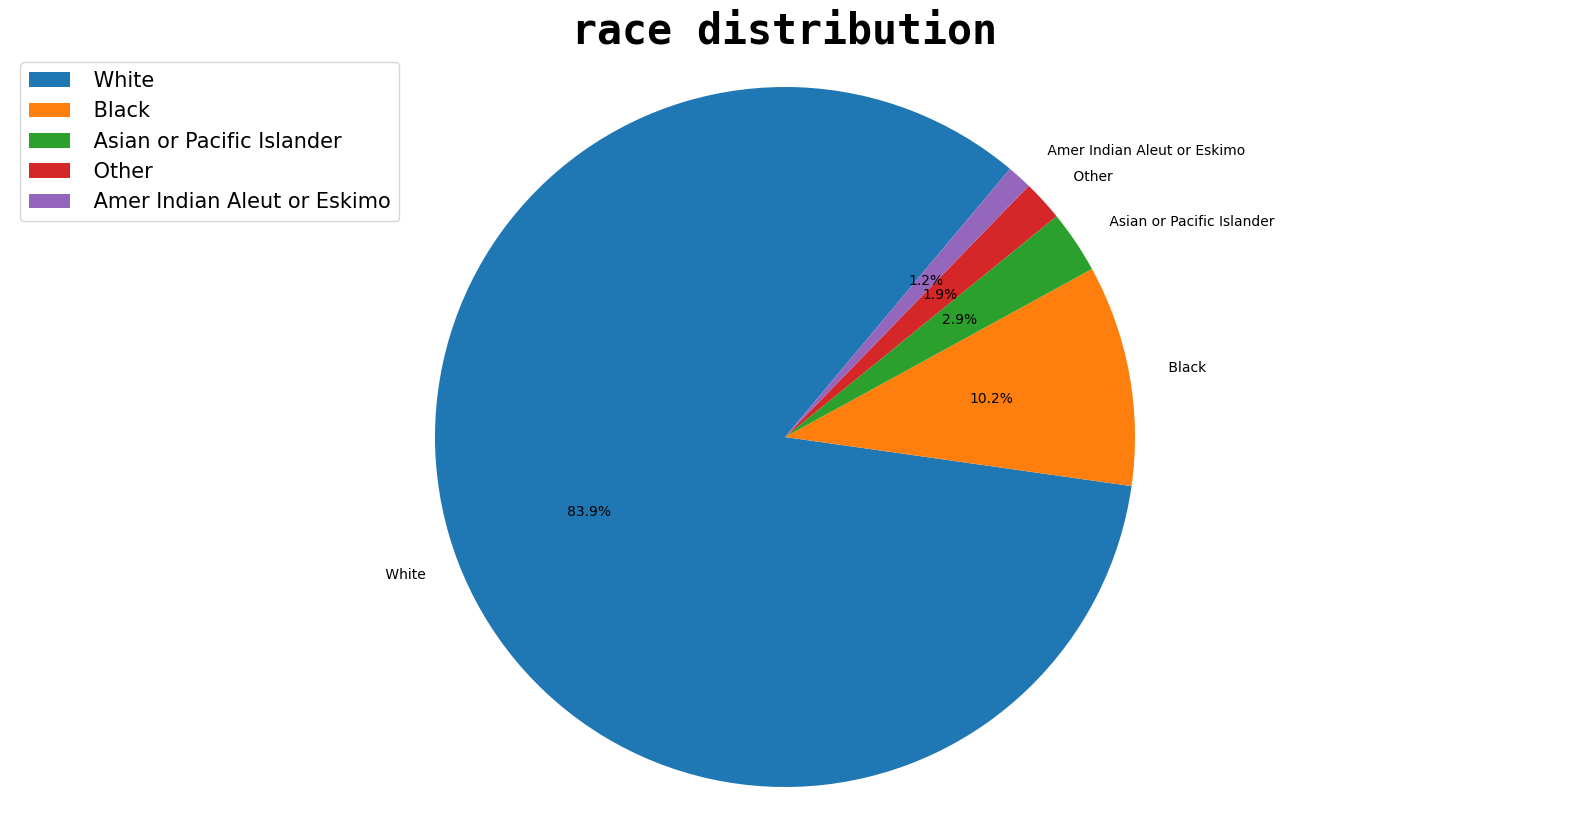

In [219]:
warnings.filterwarnings("ignore")
plt.figure(figsize=(20,10))

plt.pie(df["race"].value_counts().values,labels=df["race"].value_counts().index,autopct="%1.1f%%",startangle=50)
plt.title('race distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')

plt.legend(prop={'size': 15},loc='upper left')
plt.show()
warnings.resetwarnings()

<div style="border-radius:10px; border: #0080FF solid; padding: 15px; background-color: #CEF6F5; font-size:100%; text-align:left">
<font color='#0080FF'>Question 4: Is there any discrimation?</font>

In [220]:
print("whites income below limit :", df[(df["race"]==" White") & (df["income_above_limit"]=="Below limit")].shape[0]/df[df["race"]==" White"].shape[0]*100)
print("Non whites income bwlo limit :", df[(df["race"]!=" White") & (df["income_above_limit"]=="Below limit")].shape[0]/df[df["race"]!=" White"].shape[0]*100)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


whites income below limit : 93.26272416324719
Non whites income bwlo limit : 96.56703166617342


<div class="alert alert-success" style="font-size:14px; font-family:verdana; line-height: 1.7em;">

we can see there is no race discrimation

Text(0.5, 1.0, 'Dist of marital status')

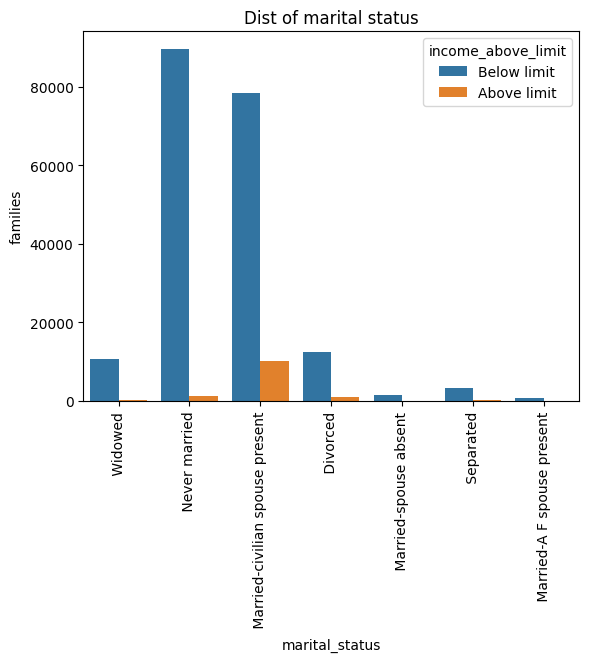

In [221]:
sns.countplot(data=df,x="marital_status",hue="income_above_limit")
plt.xticks(rotation=90)
plt.ylabel("families")
plt.title("Dist of marital status")


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: grey; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>
   
* Here we can see that non married are high having below income limit
* Married civilian have above limit and which has much numbers of families

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


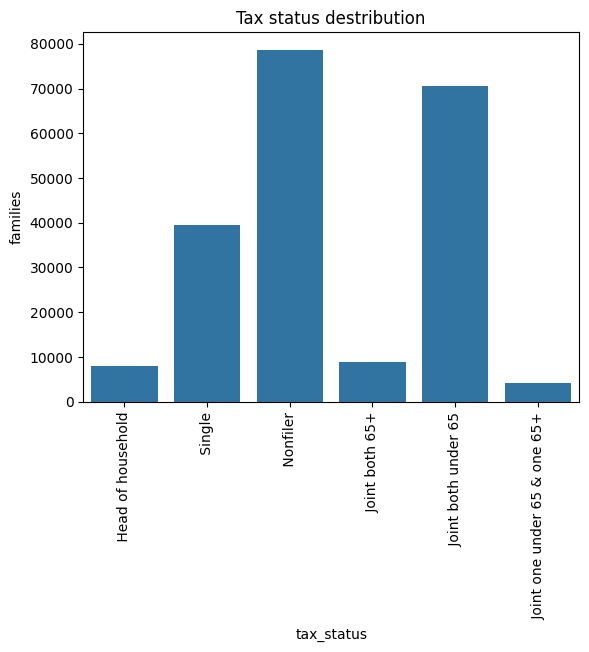

In [222]:
sns.countplot(data=df,x="tax_status")
plt.title("Tax status destribution")
plt.xticks(rotation=90)
plt.ylabel("families")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


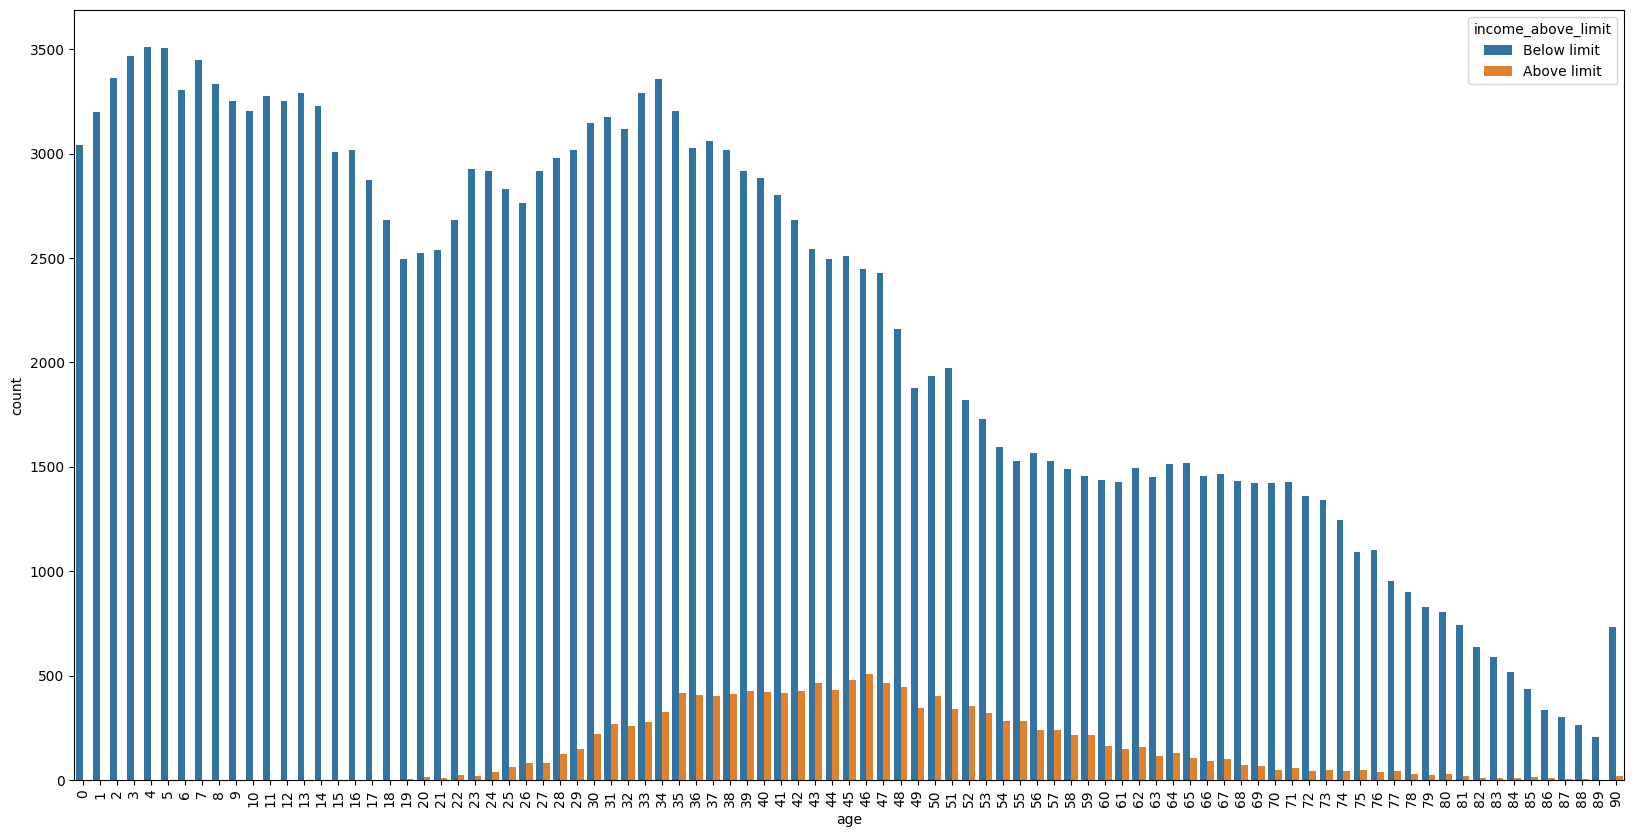

In [223]:
# Now we will plot count plot over age so we can see how age is distributed
plt.figure(figsize=(20,10))
sns.countplot(data=df,x="age",hue="income_above_limit")
plt.xticks(rotation=90)
plt.show()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: grey; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>
   
* as we can see from 22 to above have income above limit and these peoples are less compared to below limit
* Peoples with age 46 having income above limit and which are much more peoples than anyone in dataset

In [224]:
# Now we will replace above and below limit with 0 and 1

df.replace({"Below limit":0,"Above limit":1},inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [225]:
df["income_above_limit"].value_counts()

0    196501
1     12998
Name: income_above_limit, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>]], dtype=object)

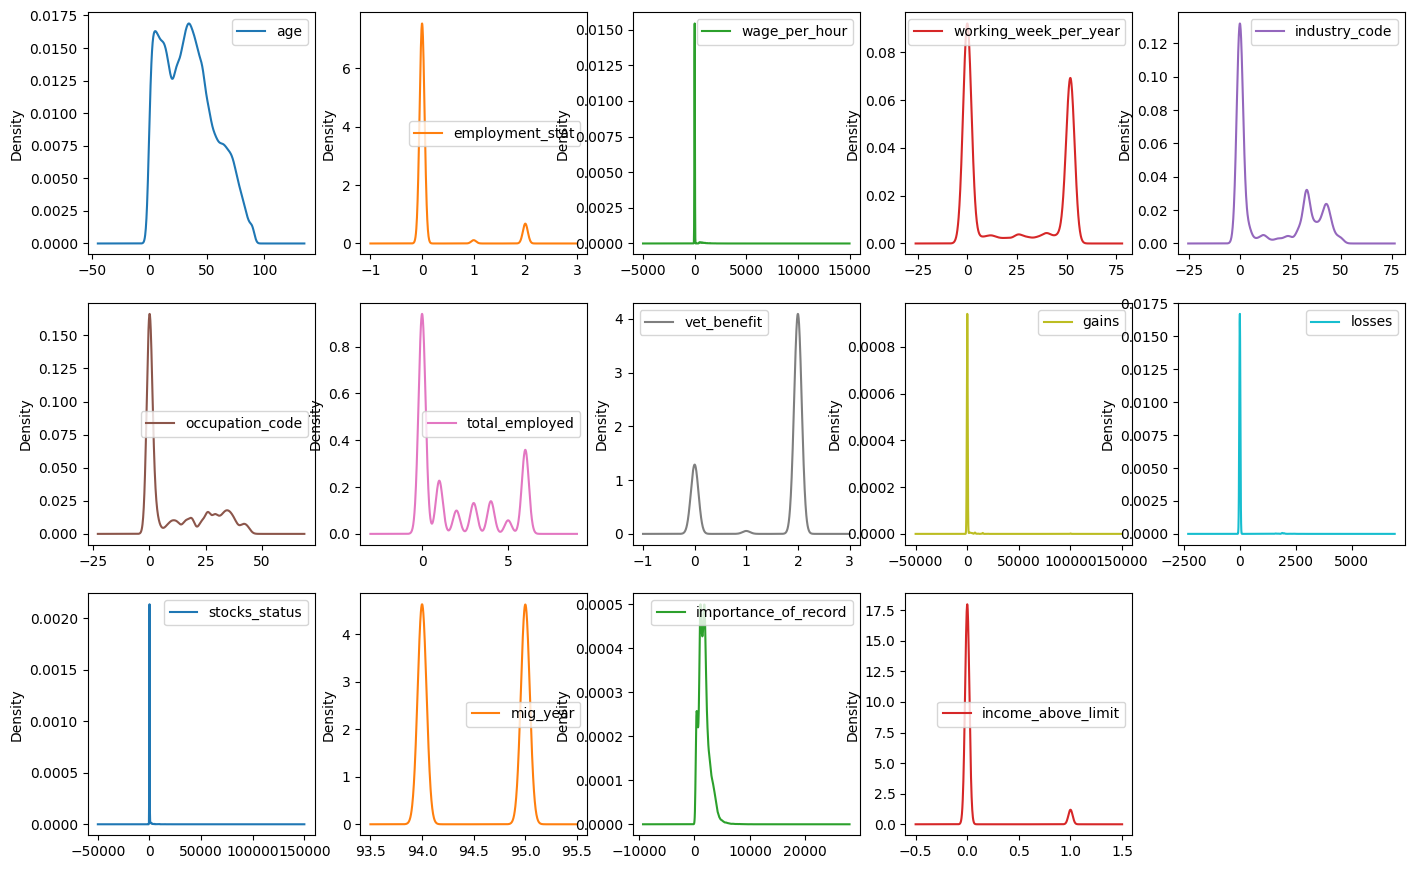

In [226]:
# We will see how numerical columns are distributed ? Normally or not

df.plot(kind="density",
       subplots=True,
        layout=(6,5),
        figsize=(17,22),
        sharex=False,
        sharey=False
       )

<Axes: >

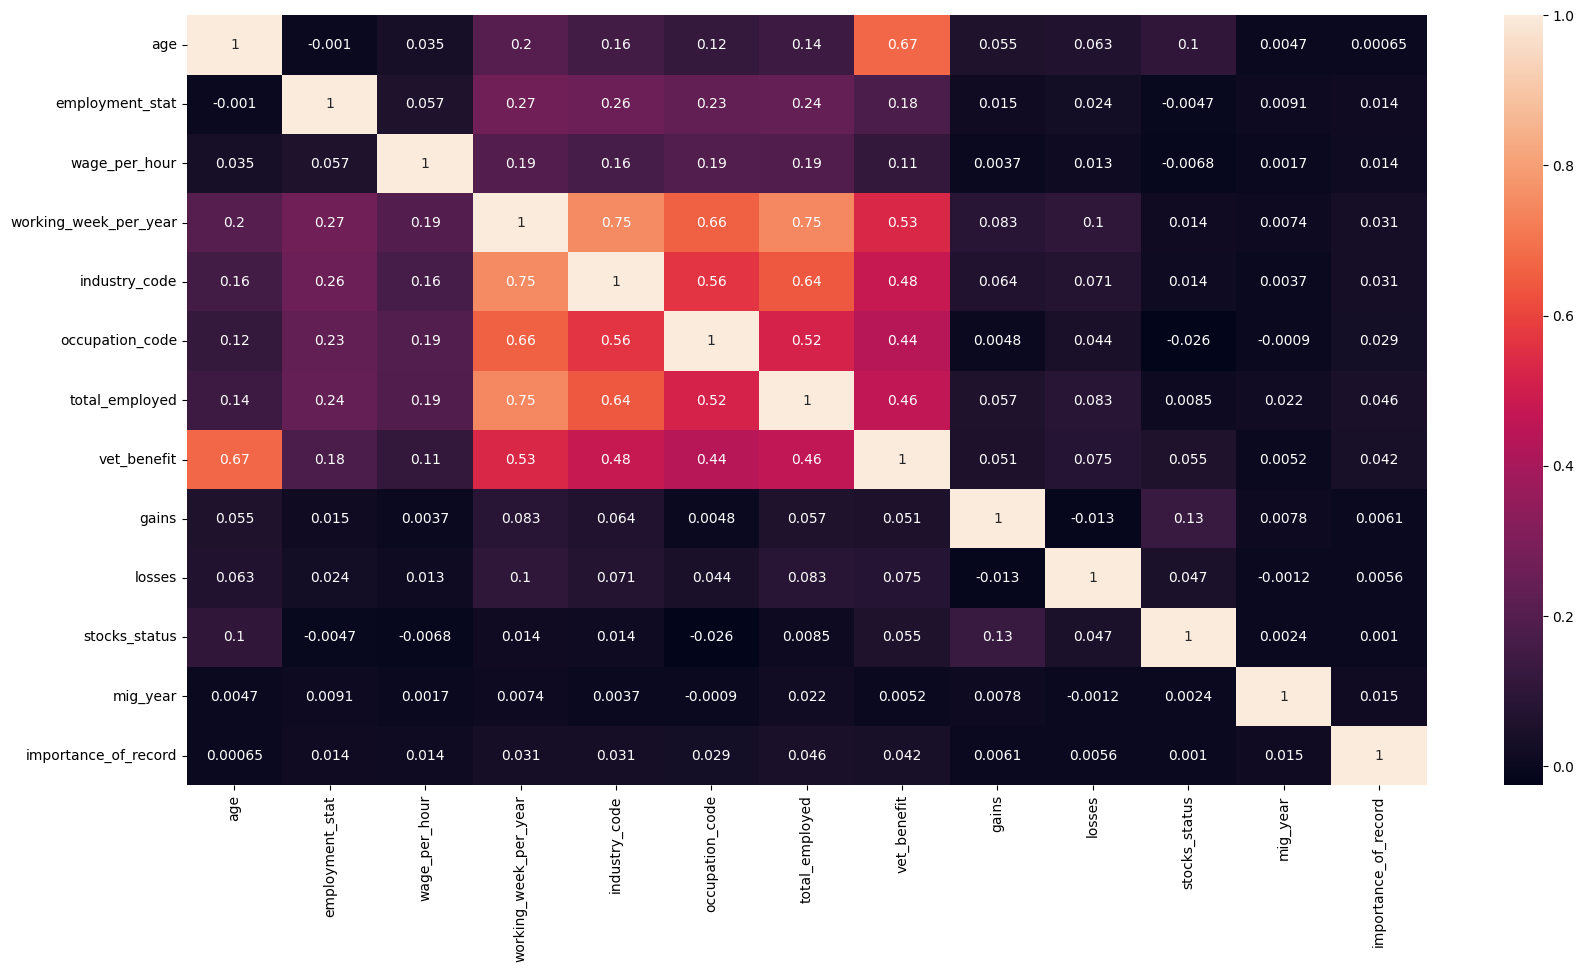

In [227]:
# lets plot heatmap to see correlation between numerical features
corr=df[numerical_features].corr(method="pearson")
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: grey; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>

From the correlation heatmap, we can see that the dependent feature 'income' is highly correlated with capital gains, total_employed, industry code, working week per year

# <span >⚙️ Data Preprocessing</span>

### <span >Null values handling</span>

In [228]:
df.isnull().mean()*100

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ID                                 0.000000
age                                0.000000
gender                             0.000000
education                          0.000000
class                             50.236517
education_institute               93.650566
marital_status                     0.000000
race                               0.000000
is_hispanic                        0.000000
employment_commitment              0.000000
unemployment_reason               96.887813
employment_stat                    0.000000
wage_per_hour                      0.000000
is_labor_union                    90.415706
working_week_per_year              0.000000
industry_code                      0.000000
industry_code_main                 0.000000
occupation_code                    0.000000
occupation_code_main              50.450837
total_employed                     0.000000
household_stat                     0.000000
household_summary                  0.000000
under_18_family                 

In [229]:
# We will drop the columns where null values are more than 50%

cols_to_drop=[]

for i in df.columns:
    if df[i].isnull().mean()>0.5:
        cols_to_drop.append(i)

In [230]:
print("These are the columns which we will drop:\n")
cols_to_drop

These are the columns which we will drop:



['class',
 'education_institute',
 'unemployment_reason',
 'is_labor_union',
 'occupation_code_main',
 'under_18_family',
 'veterans_admin_questionnaire',
 'migration_code_change_in_msa',
 'migration_prev_sunbelt',
 'migration_code_move_within_reg',
 'migration_code_change_in_reg',
 'residence_1_year_ago',
 'old_residence_reg',
 'old_residence_state']

In [231]:
print("Shape of dataset before dropping null values :",df.shape)

df=df.drop(cols_to_drop,axis=1)

print("Shape of dataset after dropping null values :",df.shape)



Shape of dataset before dropping null values : (209499, 43)
Shape of dataset after dropping null values : (209499, 29)


In [232]:
df.isnull().mean()*100

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ID                         0.000000
age                        0.000000
gender                     0.000000
education                  0.000000
marital_status             0.000000
race                       0.000000
is_hispanic                0.000000
employment_commitment      0.000000
employment_stat            0.000000
wage_per_hour              0.000000
working_week_per_year      0.000000
industry_code              0.000000
industry_code_main         0.000000
occupation_code            0.000000
total_employed             0.000000
household_stat             0.000000
household_summary          0.000000
vet_benefit                0.000000
tax_status                 0.000000
gains                      0.000000
losses                     0.000000
stocks_status              0.000000
citizenship                0.000000
mig_year                   0.000000
country_of_birth_own       1.750366
country_of_birth_father    3.427701
country_of_birth_mother    3.110277
importance_of_record       0

<div class="alert alert-danger" style="font-size:14px; font-family:verdana; line-height: 1.7em;">

Country of birth own, father, mother are not some columns that may have any affect on model

In [233]:
df = df.drop(['country_of_birth_own','country_of_birth_father','country_of_birth_mother'],axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [234]:
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(209499, 26)

age                          Axes(0.125,0.77;0.133621x0.11)
employment_stat           Axes(0.285345,0.77;0.133621x0.11)
wage_per_hour              Axes(0.44569,0.77;0.133621x0.11)
working_week_per_year     Axes(0.606034,0.77;0.133621x0.11)
industry_code             Axes(0.766379,0.77;0.133621x0.11)
occupation_code             Axes(0.125,0.638;0.133621x0.11)
total_employed           Axes(0.285345,0.638;0.133621x0.11)
vet_benefit               Axes(0.44569,0.638;0.133621x0.11)
gains                    Axes(0.606034,0.638;0.133621x0.11)
losses                   Axes(0.766379,0.638;0.133621x0.11)
stocks_status               Axes(0.125,0.506;0.133621x0.11)
mig_year                 Axes(0.285345,0.506;0.133621x0.11)
importance_of_record      Axes(0.44569,0.506;0.133621x0.11)
income_above_limit       Axes(0.606034,0.506;0.133621x0.11)
dtype: object

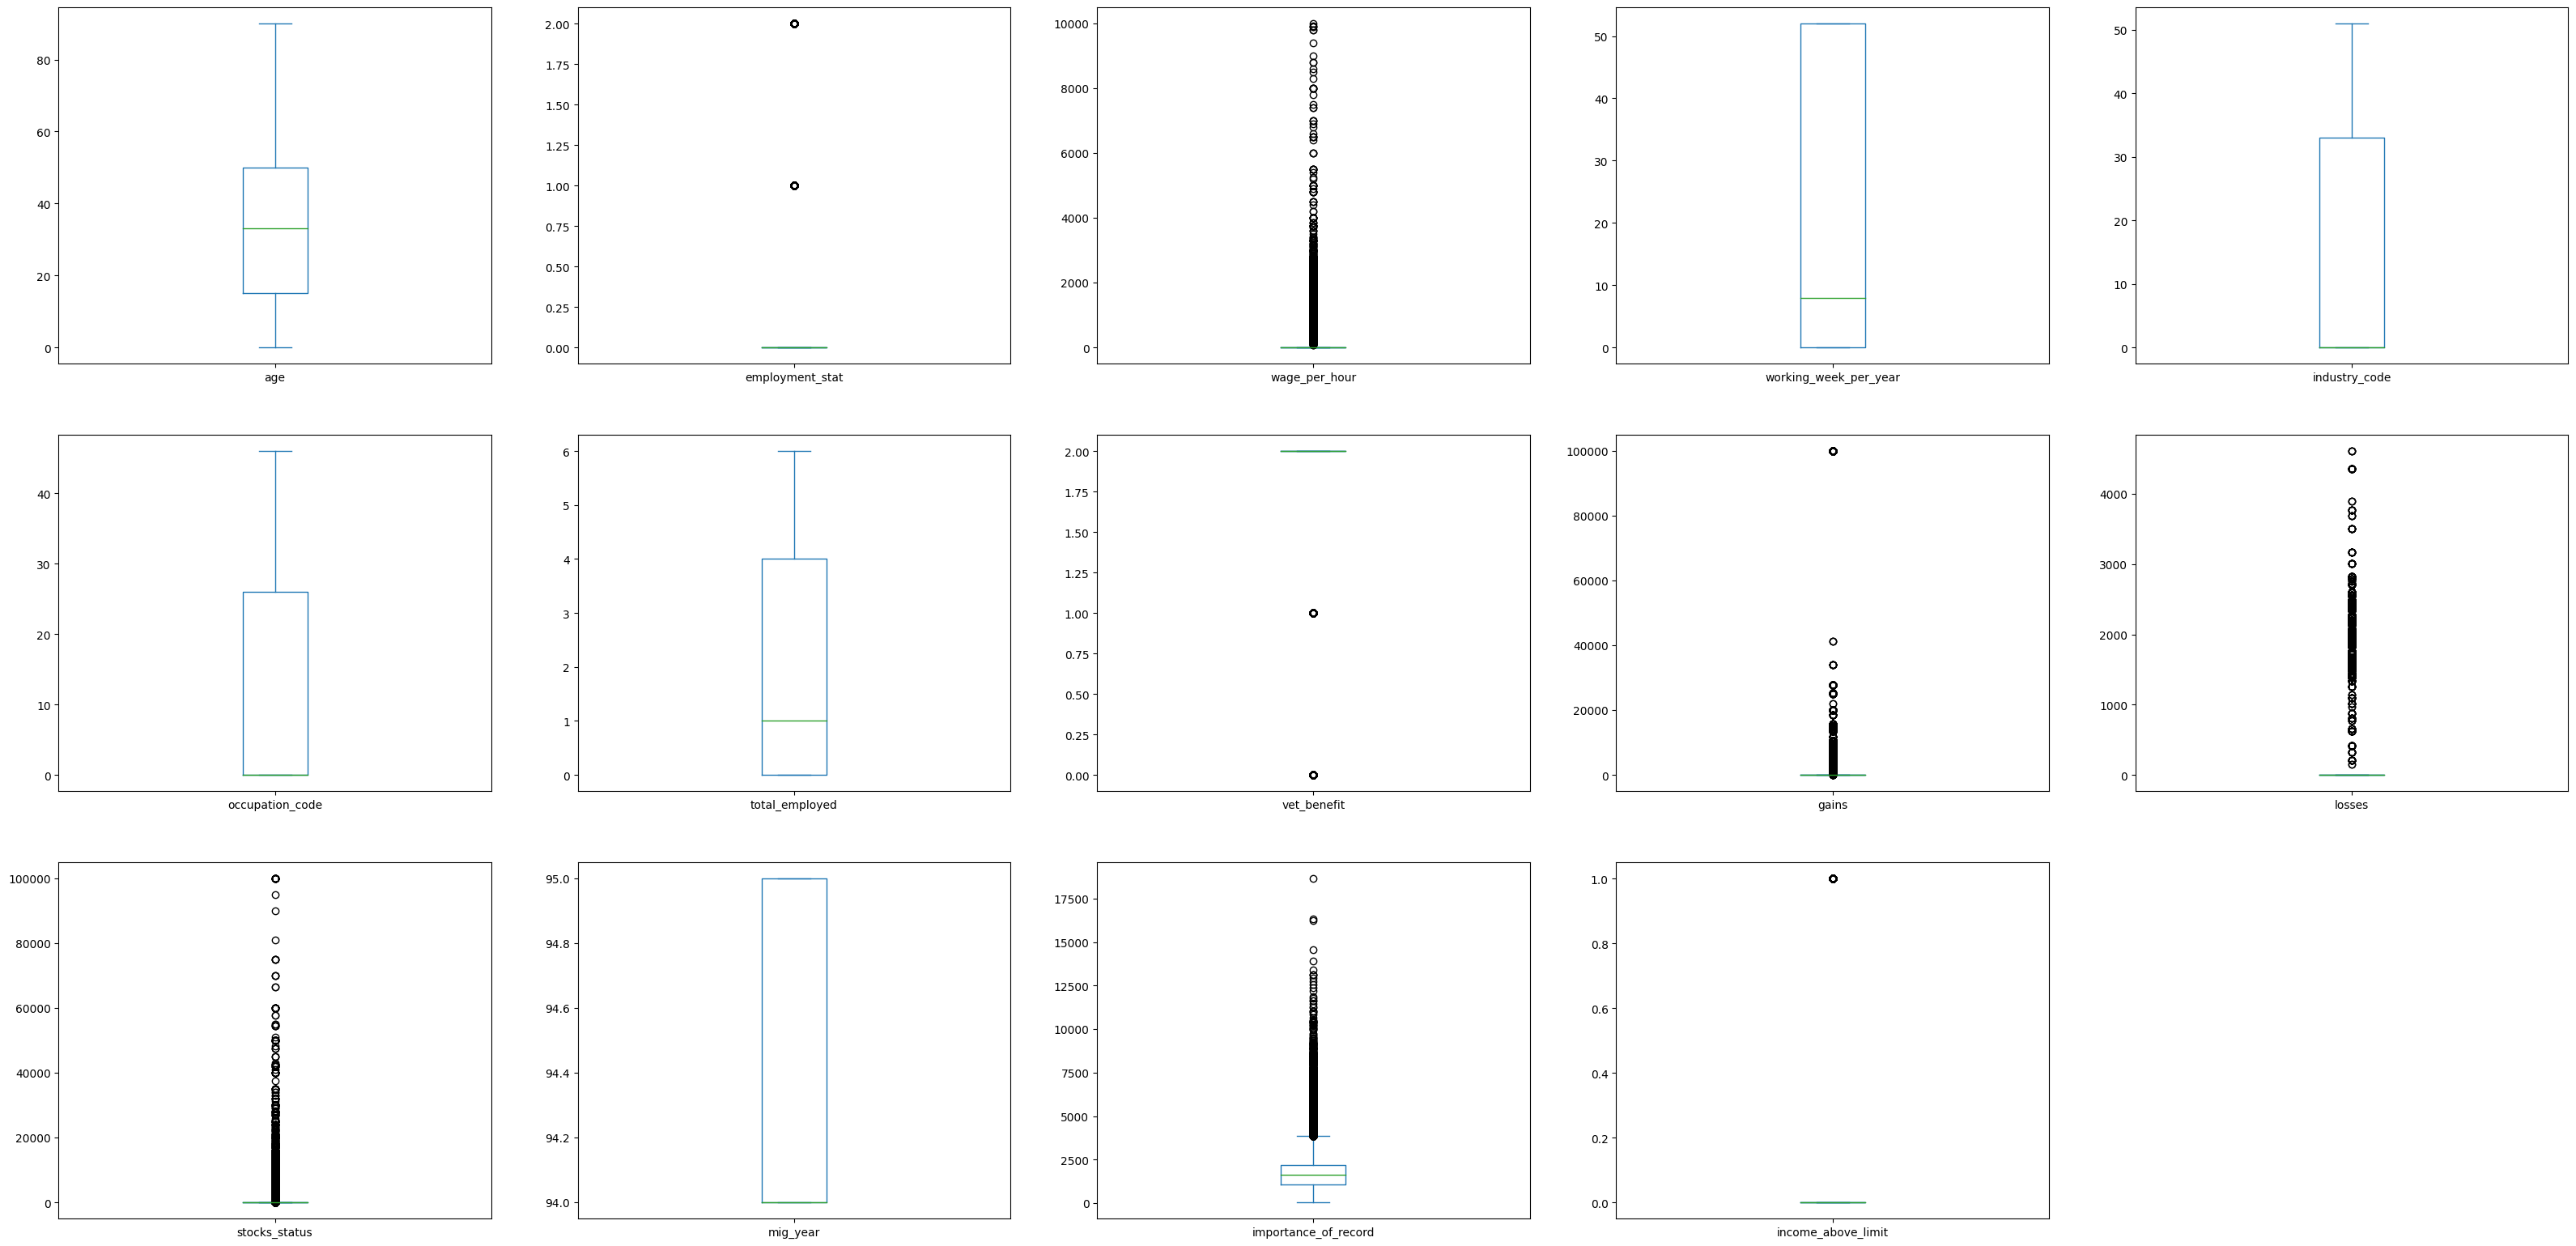

In [235]:
# Now we will check for the potential outliers in the dataset

df.plot(kind="box",
        vert=True,
        subplots=True,
        layout=(6,5),
        figsize=(40,40),
        sharex=False,
        sharey=False)

<div class="alert alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">

Some of the possible ways to handle these outliers are:
* Clip the values
* transform the values
* drop the values


<div class="alert alert-danger" style="font-size:14px; font-family:verdana; line-height: 1.7em;">

* Clipping doesn't seem nice option as it will delete the correct information
* We will check the number of outliers per column to see what can be done


In [236]:
#  we will check for the outliers
#  this method is used when destribution is normal

outlier_cols=['wage_per_hour','gains','losses','stocks_status','importance_of_record']

for i in outlier_cols:
  IQR=df[i].quantile(0.75)-df[i].quantile(0.25)
  lower=df[i].quantile(0.25)-(IQR*1.5)
  upper=df[i].quantile(0.75)-(IQR*1.5)

  outs=[]

  for j in df[i]:
    if j<lower:
      outs.append(j)

  for k in df[i]:
    if k>upper:
      outs.append(k)

  print(f" percentage of outliers in {i}: ", len(outs)/len(df)*100, "%")



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


 percentage of outliers in wage_per_hour:  5.659215557114831 %
 percentage of outliers in gains:  3.7374880071026593 %
 percentage of outliers in losses:  1.9389114029183911 %
 percentage of outliers in stocks_status:  10.516517978606103 %
 percentage of outliers in importance_of_record:  92.2959059470451 %


<div class="alert alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">

As the outliers percent are less we will proceed with retaining information and check if transformation can help

In [237]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ID,age,gender,education,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,industry_code,industry_code_main,occupation_code,total_employed,household_stat,household_summary,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,Widowed,White,All other,Not in labor force,0,0,52,0,Not in universe or children,0,2,Householder,Householder,2,Head of household,0,0,292,Native,95,1779.74,0
1,ID_TZ0001,65,Female,High school graduate,Widowed,White,All other,Children or Armed Forces,0,0,0,0,Not in universe or children,0,0,Nonfamily householder,Householder,2,Single,0,0,0,Native,94,2366.75,0
2,ID_TZ0002,21,Male,12th grade no diploma,Never married,Black,All other,Children or Armed Forces,0,500,15,41,Hospital services,26,4,Child 18+ never marr Not in a subfamily,Child 18 or older,2,Single,0,0,0,Native,94,1693.42,0
3,ID_TZ0003,2,Female,Children,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,0,0,0,0,Not in universe or children,0,0,Child <18 never marr not in subfamily,Child under 18 never married,0,Nonfiler,0,0,0,Native,94,1380.27,0
4,ID_TZ0004,70,Male,High school graduate,Married-civilian spouse present,White,All other,Not in labor force,0,0,0,0,Not in universe or children,0,0,Spouse of householder,Spouse of householder,2,Joint both 65+,0,0,0,Native,95,1580.79,0


In [238]:
categorical_features=[var for var in df.columns if df[var].dtypes=="O"]

numerical_features=[var for var in df.columns if df[var].dtypes!="O"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [239]:
for i in categorical_features:
  print(f"{i} :", df[i].unique())

ID : ['ID_TZ0000' 'ID_TZ0001' 'ID_TZ0002' ... 'ID_TZ99997' 'ID_TZ99998'
 'ID_TZ99999']
gender : [' Female' ' Male']
education : [' High school graduate' ' 12th grade no diploma' ' Children'
 ' Bachelors degree(BA AB BS)' ' 7th and 8th grade' ' 11th grade'
 ' 9th grade' ' Masters degree(MA MS MEng MEd MSW MBA)' ' 10th grade'
 ' Associates degree-academic program' ' 1st 2nd 3rd or 4th grade'
 ' Some college but no degree' ' Less than 1st grade'
 ' Associates degree-occup /vocational'
 ' Prof school degree (MD DDS DVM LLB JD)' ' 5th or 6th grade'
 ' Doctorate degree(PhD EdD)']
marital_status : [' Widowed' ' Never married' ' Married-civilian spouse present'
 ' Divorced' ' Married-spouse absent' ' Separated'
 ' Married-A F spouse present']
race : [' White' ' Black' ' Asian or Pacific Islander'
 ' Amer Indian Aleut or Eskimo' ' Other']
is_hispanic : [' All other' ' Mexican-American' ' Central or South American'
 ' Mexican (Mexicano)' ' Puerto Rican' ' Other Spanish' ' NA' ' Cuban'
 ' Do not 

In [240]:
df.drop("household_stat", axis=1,inplace=True)

In [241]:
categorical_features=[var for var in df.columns if df[var].dtypes=="O"]

numerical_features=[var for var in df.columns if df[var].dtypes!="O"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [242]:
print(f"we weill see class imbalance \n")
print(df["income_above_limit"].value_counts())

we weill see class imbalance 

0    196501
1     12998
Name: income_above_limit, dtype: int64


<div class="alert alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">

Here dataset is highly imbalanced so we will upsample the class which has less occurances

<div class="alert alert-danger" style="font-size:14px; font-family:verdana; line-height: 1.7em;">

If we go for downsampling then class occurance will fall down from 200000 to 24000

In [243]:
df.reset_index(drop=True,inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [244]:
x,y=df.drop(["ID",'income_above_limit'],axis=1), df["income_above_limit"]

In [245]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=42)
X_sampled,Y_sampled=ros.fit_resample(x,y)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [246]:
print("after sampling both classes looks like: \n", Y_sampled.value_counts())

after sampling both classes looks like: 
 0    196501
1    196501
Name: income_above_limit, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<div class="alert alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    
SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.



###  <span style="text-align:center">Creating a train test split</span>

In [247]:
X_train, X_test, Y_train, Y_test = train_test_split(X_sampled, Y_sampled, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [248]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (314401, 23)
X_test shape: (78601, 23)
Y_train shape: (314401,)
Y_test shape: (78601,)


In [249]:
X_train.reset_index(drop=True,inplace=True)
X_train.head()

,age,gender,education,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,industry_code,industry_code_main,occupation_code,total_employed,household_summary,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,importance_of_record
0,32,Male,High school graduate,Divorced,White,All other,Children or Armed Forces,0,0,52,49,Public administration,33,1,Householder,2,Head of household,0,0,0,Native,94,1207.45
1,74,Female,High school graduate,Married-civilian spouse present,White,All other,Children or Armed Forces,0,0,0,0,Not in universe or children,0,0,Spouse of householder,2,Nonfiler,0,0,0,Native,94,2242.96
2,43,Male,Associates degree-academic program,Never married,White,All other,Unemployed part- time,0,0,52,29,Transportation,15,6,Householder,2,Single,0,0,0,Native,95,3371.85
3,43,Male,Some college but no degree,Never married,White,All other,Full-time schedules,0,0,52,30,Communications,14,6,Householder,2,Single,0,0,125,Native,95,1315.73
4,22,Female,Some college but no degree,Never married,White,Other Spanish,Not in labor force,0,0,0,0,Not in universe or children,0,0,Child 18 or older,2,Nonfiler,0,0,0,Native,95,691.33


In [250]:
X_test.reset_index(drop=True,inplace=True)
X_test.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,age,gender,education,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,industry_code,industry_code_main,occupation_code,total_employed,household_summary,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,importance_of_record
0,28,Male,High school graduate,Married-civilian spouse present,White,Puerto Rican,Children or Armed Forces,0,0,52,4,Construction,34,2,Householder,2,Joint both under 65,0,0,0,Native,94,905.79
1,21,Male,High school graduate,Never married,White,All other,Full-time schedules,0,800,45,4,Construction,39,6,Householder,2,Single,27828,0,0,Native,95,1299.69
2,43,Female,Some college but no degree,Married-civilian spouse present,White,All other,Full-time schedules,0,0,52,29,Transportation,38,6,Spouse of householder,2,Joint both under 65,0,0,0,Native,95,3852.26
3,40,Female,11th grade,Widowed,White,Central or South American,Children or Armed Forces,0,650,52,33,Retail trade,26,3,Householder,2,Head of household,0,0,0,Native,94,1081.40
4,6,Male,Children,Never married,White,All other,Children or Armed Forces,0,0,0,0,Not in universe or children,0,0,Child under 18 never married,0,Nonfiler,0,0,0,Native,95,3522.25


###  <span style="text-align:center">Encoding</span>

In [251]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [291]:
categorical_features=[var for var in X_sampled.columns if X_sampled[var].dtypes=="O"]
numerical_features=[var for var in X_sampled.columns if X_sampled[var].dtypes!="O"]

In [292]:
categorical_features

['gender',
 'education',
 'marital_status',
 'race',
 'is_hispanic',
 'employment_commitment',
 'industry_code_main',
 'household_summary',
 'tax_status',
 'citizenship']

In [294]:
trf=ColumnTransformer(transformers=[(
    ("ohe",OneHotEncoder(sparse=False,drop="first"),categorical_features)

)],remainder='passthrough')

In [295]:
from sklearn.ensemble import RandomForestClassifier


### <span style="*text*-align:center">Random Forest Classifier 🌲🎄🌳🌴</span>

In [296]:
rfc=RandomForestClassifier(random_state=42)

In [313]:
 rfc_pipe=Pipeline([
    ("trf",trf),
    ("model",rfc)])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [314]:
rfc_pipe.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['gender', 'education',
                                                   'marital_status', 'race',
                                                   'is_hispanic',
                                                   'employment_commitment',
                                                   'industry_code_main',
                                                   'household_summary',
                                                   'tax_status',
                                                   'citizenship'])])),
                ('model', RandomForestClassifier(random_state=42))])

In [315]:
rfc_pred=rfc_pipe.predict(X_test)

In [316]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score,precision_score

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [317]:
accuracy_score(Y_test,rfc_pred)

0.9102428722280888

In [318]:
print('Random Forest Classifier:')
print('F1 score:', round(f1_score(Y_test, rfc_pred), 2))

Random Forest Classifier:
F1 score: 0.91


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [319]:
print(classification_report(Y_test, rfc_pred))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


              precision    recall  f1-score   support

           0       0.93      0.89      0.91     39578
           1       0.89      0.93      0.91     39023

    accuracy                           0.91     78601
   macro avg       0.91      0.91      0.91     78601
weighted avg       0.91      0.91      0.91     78601



### <span style="*text*-align:center">XGB Classifier 🌲🎄🌳🌴</span>  

In [320]:
xgb = XGBClassifier()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [305]:
xgb_pipe=Pipeline([
    ("trf",trf),
    ("model",xgb)
])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [306]:
xgb_pipe.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['gender', 'education',
                                                   'marital_status', 'race',
                                                   'is_hispanic',
                                                   'employment_commitment',
                                                   'industry_code_main',
                                                   'household_summary',
                                                   'tax_status',
                                                   'citizenship'])])),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [308]:
xgb_pred=xgb_pipe.predict(X_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print('XGB Classifier:')
print('F1 score:', round(f1_score(Y_test, xgb_pred), 2))

In [309]:
print(classification_report(Y_test,xgb_pred))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


              precision    recall  f1-score   support

           0       0.93      0.89      0.91     39578
           1       0.89      0.93      0.91     39023

    accuracy                           0.91     78601
   macro avg       0.91      0.91      0.91     78601
weighted avg       0.91      0.91      0.91     78601



<div class="alert alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">

Very good accuracy on Random forest model as compared to XGB. But lets see how Random forest is working better?